<a href="https://colab.research.google.com/github/reinaldoasf/deeplearning/blob/master/deepLearning1-spirals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questao 6**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
teta = np.linspace(0,20,num=100);
print(teta);


[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16

 **Training and Test Data**

,X,Y,classe
94,4.700798,0.664090,0.0
26,0.675282,-1.126192,0.0
32,1.589626,0.291664,0.0
74,-2.712924,2.570605,0.0
107,0.179969,1.139410,1.0
...,...,...,...
194,5.492932,0.775996,1.0
29,1.334591,-0.603370,0.0
46,-2.303068,0.305428,0.0
173,-2.571513,3.676862,1.0


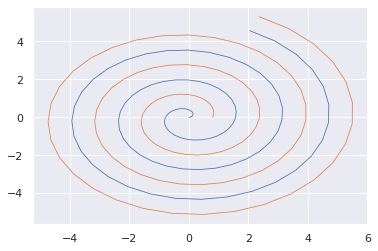

In [ ]:
x_esp1 = (teta/4)*np.cos(teta)
y_esp1 = (teta/4)*np.sin(teta)
x_esp2 = (teta/4+.8)*np.cos(teta)
y_esp2 = (teta/4+.8)*np.sin(teta)

plt.plot(x_esp1,y_esp1)
plt.plot(x_esp2,y_esp2)
classe = np.append(np.zeros(100),np.ones(100))

#building the dataset:
entry = np.array([np.append(x_esp1,x_esp2),np.append(y_esp1,y_esp2)])
data = pd.DataFrame({'X':entry[0],'Y':entry[1],'classe':classe})
data = data.reindex(np.random.permutation(data.index))

#Stablishing input
x_train = data[['X','Y']].to_numpy()[:170]
x_test = data[['X','Y']].to_numpy()[170:200]

#Stablishing output
y_train = data['classe'].to_numpy()[:170]
y_test = data['classe'].to_numpy()[170:200]
data
#x_train = data[:, ['X','Y']]


 **Buiding model**

In [ ]:
model = Sequential()
model.add(Dense(30,input_shape=(2,),activation='relu')) #inputs in x,y coordinates
#model.add(Dropout(0.2))
model.add(Dense(1,activation='relu')) #output class
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile( optimizer= 'adam', loss = 'binary_crossentropy' ,metrics=['accuracy'])

print("Training started..., this can take a while:")

# Fit your model on your data for 20 epochs

model.fit(x_train,y_train, epochs = 100);

# Evaluate your model 
print("Final lost value:",model.evaluate(x_test, y_test))

Training started..., this can take a while:
Epoch 1/100
170/170 [==============================] - 0s 458us/step - loss: 3.4190 - accuracy: 0.4824
Epoch 2/100
170/170 [==============================] - 0s 53us/step - loss: 2.8315 - accuracy: 0.4824
Epoch 3/100
170/170 [==============================] - 0s 57us/step - loss: 2.2255 - accuracy: 0.4824
Epoch 4/100
170/170 [==============================] - 0s 52us/step - loss: 1.8190 - accuracy: 0.5059
Epoch 5/100
170/170 [==============================] - 0s 55us/step - loss: 1.6712 - accuracy: 0.5118
Epoch 6/100
170/170 [==============================] - 0s 52us/step - loss: 1.4967 - accuracy: 0.5118
Epoch 7/100
170/170 [==============================] - 0s 61us/step - loss: 1.4002 - accuracy: 0.5000
Epoch 8/100
170/170 [==============================] - 0s 58us/step - loss: 1.1653 - accuracy: 0.5176
Epoch 9/100
170/170 [==============================] - 0s 52us/step - loss: 1.0029 - accuracy: 0.5471
Epoch 10/100
170/170 [===============

In [ ]:
# Evaluate your model 
print("Final lost value:",model.evaluate(x_test, y_test))

30/30 [==============================] - 0s 32us/step
Final lost value: [0.5928522348403931, 0.7333333492279053]


**Second Model**

In [ ]:
model2 = Sequential()
model2.add(Dense(30,input_shape=(2,),activation='relu')) #inputs in x,y coordinates
model2.add((Dense(20,activation='relu')))
#model2.add((Dense(20,activation='relu')))
#model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid')  ) #output class
model2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_44 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 21        
Total params: 731
Trainable params: 731
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile( optimizer= 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

print("Training started..., this can take a while:")

# Fit your model on your data for 20 epochs
#x_train,y_train
model2.fit(x_train,y_train, epochs = 100);


Training started..., this can take a while:
Epoch 1/100
170/170 [==============================] - 0s 520us/step - loss: 0.7552 - accuracy: 0.5176
Epoch 2/100
170/170 [==============================] - 0s 53us/step - loss: 0.7277 - accuracy: 0.5412
Epoch 3/100
170/170 [==============================] - 0s 51us/step - loss: 0.7074 - accuracy: 0.5412
Epoch 4/100
170/170 [==============================] - 0s 52us/step - loss: 0.6945 - accuracy: 0.5471
Epoch 5/100
170/170 [==============================] - 0s 59us/step - loss: 0.6892 - accuracy: 0.5529
Epoch 6/100
170/170 [==============================] - 0s 53us/step - loss: 0.6867 - accuracy: 0.5706
Epoch 7/100
170/170 [==============================] - 0s 68us/step - loss: 0.6855 - accuracy: 0.6176
Epoch 8/100
170/170 [==============================] - 0s 62us/step - loss: 0.6841 - accuracy: 0.5824
Epoch 9/100
170/170 [==============================] - 0s 56us/step - loss: 0.6833 - accuracy: 0.5765
Epoch 10/100
170/170 [===============

In [ ]:
# Evaluate your model 
print("Final lost value:",model2.evaluate(x_test, y_test))

30/30 [==============================] - 0s 472us/step
Final lost value: [0.6315601468086243, 0.699999988079071]


**Matrizes de confusão**

A acurácia do modelo do item a é de 0.7333333333333333
              precision    recall  f1-score   support

         0.0     0.7647    0.7647    0.7647        17
         1.0     0.6923    0.6923    0.6923        13

    accuracy                         0.7333        30
   macro avg     0.7285    0.7285    0.7285        30
weighted avg     0.7333    0.7333    0.7333        30

None


Text(0.5, 1.0, 'Matriz de confusão modelo 1')

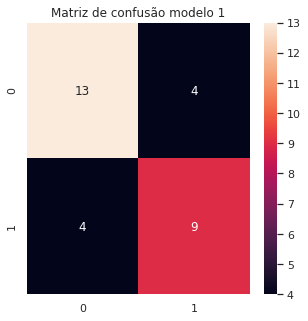

In [ ]:
predict = model.predict_classes(x_test)

conf_mat = confusion_matrix(y_test, predict)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f")
print(f"A acurácia do modelo do item a é de {accuracy_score(y_test, predict)}")
print(print(classification_report(y_test, predict, digits=4)))
ax.set_title("Matriz de confusão modelo 1")


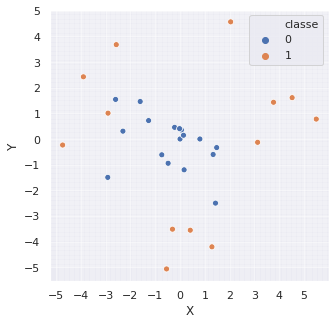

In [ ]:
newdata = pd.DataFrame({'X':x_test[:,0],'Y':x_test[:,1],'classe':predict[:,0]})




fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every 5/100
major_ticks = np.arange(-5, 6, 1)
minor_ticks = np.arange(-5, 6, 1/20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
sns.scatterplot("X", "Y", data=newdata, hue="classe", ax=ax)


A acurácia do modelo do item a é de 0.7
              precision    recall  f1-score   support

         0.0     0.7500    0.7059    0.7273        17
         1.0     0.6429    0.6923    0.6667        13

    accuracy                         0.7000        30
   macro avg     0.6964    0.6991    0.6970        30
weighted avg     0.7036    0.7000    0.7010        30

None


Text(0.5, 1.0, 'Matriz de confusão modelo 2')

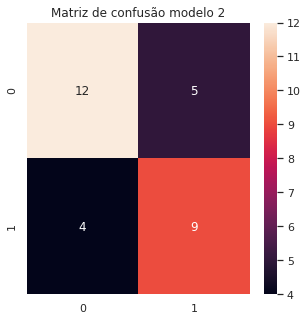

In [ ]:
predict = model2.predict_classes(x_test)
#predict = np.around(predict)

conf_mat = confusion_matrix(y_test, predict)
plt.figure(figsize=(5, 5))
ax = sns.heatmap(conf_mat, annot=True, fmt=".0f")
print(f"A acurácia do modelo do item a é de {accuracy_score(y_test, predict)}")
print(print(classification_report(y_test, predict, digits=4)))
ax.set_title("Matriz de confusão modelo 2")

**Plot figures**

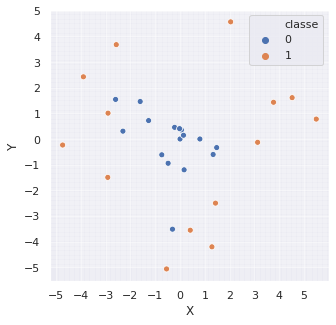

In [ ]:
x_grid = np.linspace(-5,5,num=100);
y_grid = np.linspace(-5,5,num=100);


#fig = plt.figure(figsize=(1.2,1.2))
#ax = fig.add_axes([-5,-5,5,5])
#fig,ax = plt.subplots()

newdata = pd.DataFrame({'X':x_test[:,0],'Y':x_test[:,1],'classe':predict[:,0]})




fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 1, minor ticks every 5/100
major_ticks = np.arange(-5, 6, 1)
minor_ticks = np.arange(-5, 6, 1/20)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})
sns.scatterplot("X", "Y", data=newdata, hue="classe", ax=ax)
